In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [26]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [20]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [21]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [22]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [29]:
Inspect = inspect(engine)
Inspect.get_table_names()

['measurement', 'station']

In [30]:
#To get the column details, we use get_column function from inspect
columns_measurement = Inspect.get_columns('measurement')
for cols in columns_measurement:
    print(cols["name"], cols["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [31]:
columns_station = Inspect.get_columns('station')
for cols in columns_station:
    print(cols["name"], cols["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [33]:
# Display the measurement row's columns and data in dictionary format
measure_row = session.query(Measurement).first()
measure_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0xaf1bdd8>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01'}

In [34]:
# Display the station row's columns and data in dictionary format
station_row = session.query(Station).first()
station_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0xaf69978>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'id': 1,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US'}

In [41]:
#Clean up the data

meas_result = engine.execute("SELECT count(*) FROM Measurement").fetchall()
print(meas_result)

[(19550,)]


In [42]:
stn_result = engine.execute("SELECT count(*) FROM Station").fetchall()
print(stn_result)

[(9,)]


In [44]:
meas_result = engine.execute("SELECT count(*) FROM Measurement WHERE station is Null").fetchall()
print(meas_result)

[(0,)]


In [46]:
meas_result = engine.execute("SELECT count(*) FROM Measurement WHERE date is Null").fetchall()
print(meas_result)

[(0,)]


In [47]:
meas_result = engine.execute("SELECT count(*) FROM Measurement WHERE prcp is Null").fetchall()
print(meas_result)

[(1447,)]


In [48]:
#The 'Measurement' table has 1447 occurences of Null values for "prcp".
#Updating the 'Measurement' table and to set the "prcp" to 0.0 where there is Null values or None values

engine.execute("Update Measurement SET prcp=0.0 WHERE prcp is NULL")

In [50]:
session.commit()

In [52]:
meas_result = engine.execute("SELECT count(*) FROM Measurement WHERE prcp is Null").fetchall()
print(meas_result)

[(0,)]


# Exploratory Climate Analysis

In [1]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [53]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

#Step 1: Get the latest date

Latest_date = engine.execute("SELECT MAX(date) FROM Measurement").fetchall()
print(Latest_date)

[('2017-08-23',)]


In [54]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

prcp_qry = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date <= '2017-08-23').\
        filter(Measurement.date >= '2016-08-22').all()
prcp_plot_pd = pd.DataFrame(data=prcp_qry, columns=["date", "prcp"])
prcp_plot_pd = prcp_plot_pd.set_index('date', drop=True)
prcp_plot_pd.head()

,prcp
date,
2016-08-22,0.40
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00


In [86]:
# Calculate the date 1 year ago from the last data point in the database
max_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
max_date = max_date[0]
max_date

'2017-08-23'

In [87]:
# The number of days are equal 366 so that the first day of the year is included
year_ago = dt.datetime.strptime(max_date, "%Y-%m-%d") - dt.timedelta(days=366)
year_ago

datetime.datetime(2016, 8, 22, 0, 0)

In [88]:
# Perform a query to retrieve the data and precipitation scores
data_prcp_score = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()
data_prcp_score

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', 0.0),
 ('2016-09-06', 0.0),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 

In [91]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(data_prcp_score,columns=['date', 'precipitation'])
precipitation_df

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
5,2016-08-28,0.01
6,2016-08-29,0.00
7,2016-08-30,0.00
8,2016-08-31,0.13
9,2016-09-01,0.00


In [92]:
# Change datatype from element to datetime object on Pandas
precipitation_df['date'] = pd.to_datetime(precipitation_df['date'], format='%Y-%m-%d')
precipitation_df

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
5,2016-08-28,0.01
6,2016-08-29,0.00
7,2016-08-30,0.00
8,2016-08-31,0.13
9,2016-09-01,0.00


In [93]:
# Set index to date
precipitation_df.set_index('date', inplace=True)

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by='date',ascending=True)
precipitation_df

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
2016-08-23,0.02
2016-08-24,0.08
2016-08-24,2.15


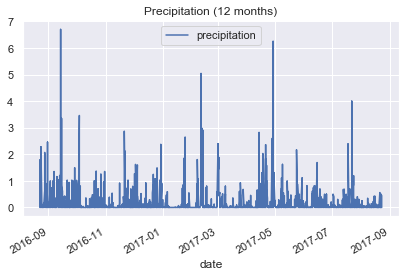

In [98]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df .plot(title="Precipitation (12 months)")
plt.legend(loc='upper center')
plt.savefig("Images/Precipitation.png")
plt.show()

In [97]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2230.000000
mean,0.160664
std,0.442067
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


In [104]:
# Design a query to show how many stations are available in this dataset?
stn_cnt_qry = session.query(Station.station).count()
#stn_cnt_qry
print(f"Stations Available: {stn_cnt_qry} ")

Stations Available: 9 


In [105]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stns = session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc())
print(f"Most Active Stations")
active_stns.all()

Most Active Stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [108]:
# Finding most active station 
most_act_stn=active_stns[0][0]
print(f"Most Active Station: {most_act_stn}")

Most Active Station: USC00519281


In [109]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

most_active_temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),
                                  func.avg(Measurement.tobs)).filter(Measurement.station == most_act_stn).all()
print(f"Most Active Station Temperatures")
print(f"Low: {most_active_temps[0][0]} High: {most_active_temps[0][1]} Average: {round(most_active_temps[0][2], 1)}")

Most Active Station Temperatures
Low: 54.0 High: 85.0 Average: 71.7


In [110]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

stn_12mths = session.query(Measurement.station, Measurement.date, Measurement.tobs).group_by(Measurement.date).\
    filter(Measurement.date <= '2017-08-23').filter(Measurement.date >= '2016-08-22').\
    filter(Measurement.station=="USC00519281").all()
stn_12mths

[('USC00519281', '2016-08-22', 78.0),
 ('USC00519281', '2016-08-23', 77.0),
 ('USC00519281', '2016-08-24', 77.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519281', '2016-08-27', 75.0),
 ('USC00519281', '2016-08-28', 73.0),
 ('USC00519281', '2016-08-29', 78.0),
 ('USC00519281', '2016-08-30', 77.0),
 ('USC00519281', '2016-08-31', 78.0),
 ('USC00519281', '2016-09-01', 80.0),
 ('USC00519281', '2016-09-02', 80.0),
 ('USC00519281', '2016-09-03', 78.0),
 ('USC00519281', '2016-09-04', 78.0),
 ('USC00519281', '2016-09-05', 78.0),
 ('USC00519281', '2016-09-06', 73.0),
 ('USC00519281', '2016-09-07', 74.0),
 ('USC00519281', '2016-09-08', 80.0),
 ('USC00519281', '2016-09-09', 79.0),
 ('USC00519281', '2016-09-10', 77.0),
 ('USC00519281', '2016-09-11', 80.0),
 ('USC00519281', '2016-09-12', 76.0),
 ('USC00519281', '2016-09-13', 79.0),
 ('USC00519281', '2016-09-14', 75.0),
 ('USC00519281', '2016-09-15', 79.0),
 ('USC00519281', '2016-09-16', 78.0),
 ('USC005192

In [111]:
#Put data into dataframe to be plotted as histogram
history_pd = pd.DataFrame(data=stn_12mths, columns=["station", "date", "tobs"])
history_pd = history_pd.set_index('date', drop=True)
history_pd = history_pd.drop(columns="station", axis=1)
history_pd.head()

,tobs
date,
2016-08-22,78.0
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0


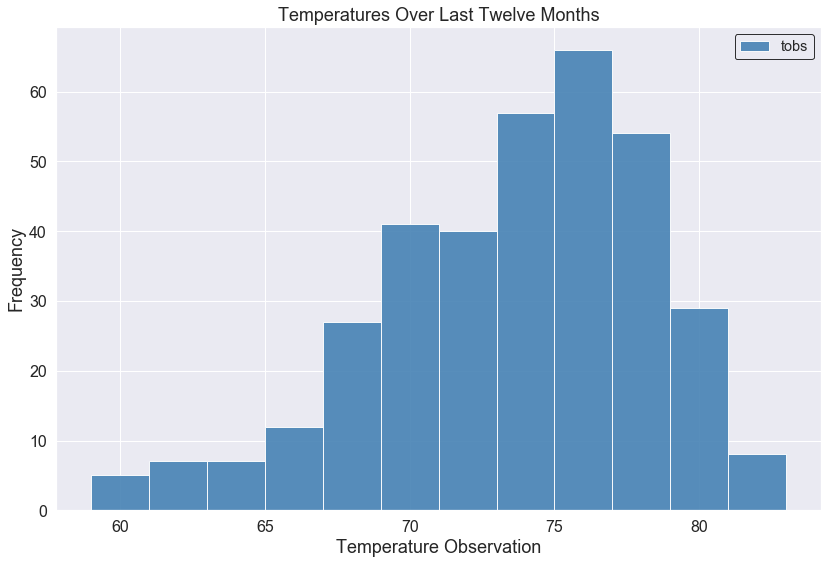

In [115]:
sns.set()
#Plot the results as a histogram with bins of 12 since observation is for 12months
x = history_pd['tobs']
num_bins = 12
# the histogram of the data
#n, bins, patches = 
plt.figure(figsize=[12.8, 8])
temp_plot = plt.hist(x, num_bins, facecolor='steelblue', label='tobs', alpha=0.9)

plt.xlabel('Temperature Observation', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Temperatures Over Last Twelve Months', fontsize=18)
plt.tick_params(axis='y', labelsize=16)
plt.tick_params(axis='x', labelsize=16)
legend = plt.legend(frameon=True, edgecolor='black', fontsize='large')
plt.tight_layout()

plt.subplots_adjust(left=0.15)
plt.show()

In [125]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [126]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
my_trip = calc_temps('2017-07-05','2017-07-19')
my_trip

[(69.0, 78.19587628865979, 83.0)]

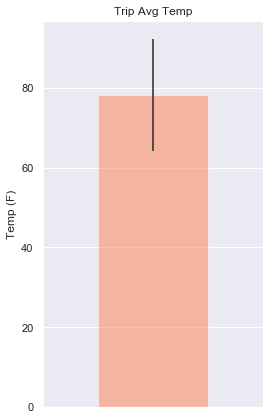

In [127]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

# Create a dataframe with the calculated tmin, tavg, and tmax values
trip_temp_df = pd.DataFrame(my_trip, columns=['tmin', 'tavg', 'tmax'])

trip_temp_df.plot.bar(y='tavg', yerr=(trip_temp_df['tmax'] - trip_temp_df['tmin']), title='Trip Avg Temp', color='coral', alpha=0.5, figsize=(4,6))
plt.xticks(np.arange(1, 1.0))
plt.ylabel("Temp (F)")
plt.tight_layout()
plt.gca().legend_.remove()
plt.savefig("Images/TripAvgTemp.png")
plt.show()

In [145]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

stn_rain = session.query(Measurement.station, func.sum(Measurement.prcp))\
                       .filter(Measurement.date>='2017-07-05').filter(Measurement.date<='2017-07-19')\
                       .group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()  
print("Station Id\tTotal Rainfall")
for each in stn_rain: print(each[0],"\t",each[1])     

Station Id	Total Rainfall
USC00516128 	 5.43
USC00519281 	 1.5900000000000003
USC00513117 	 0.7800000000000001
USC00514830 	 0.76
USC00519397 	 0.19
USC00519523 	 0.11
USC00517948 	 0.0


In [146]:
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

sel = [Measurement.station,Station.name,func.sum(Measurement.prcp),Station.latitude,Station.longitude,Station.elevation]
stn_rain_tot = session.query(*sel).filter(Measurement.station==Station.station)\
                       .filter(Measurement.date>='2017-07-05').filter(Measurement.date<='2017-07-14')\
                       .group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()

for result in stn_rain_tot: print(result)

('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 1.77, 21.3331, -157.8025, 152.4)
('USC00519281', 'WAIHEE 837.5, HI US', 1.1300000000000001, 21.45167, -157.84888999999998, 32.9)
('USC00513117', 'KANEOHE 838.1, HI US', 0.53, 21.4234, -157.8015, 14.6)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 0.38, 21.5213, -157.8374, 7.0)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 0.11, 21.33556, -157.71139, 19.5)
('USC00519397', 'WAIKIKI 717.2, HI US', 0.09000000000000001, 21.2716, -157.8168, 3.0)
('USC00517948', 'PEARL CITY, HI US', 0.0, 21.3934, -157.9751, 11.9)


# Step 2 - Climate App

Now that you have completed your initial analysis, design a Flask API based on the queries that you have just developed.

Use FLASK to create your routes.

Routes

/

Home page.
List all routes that are available.

/api/v1.0/precipitation

Convert the query results to a Dictionary using date as the key and prcp as the value.
Return the JSON representation of your dictionary.

/api/v1.0/stations

Return a JSON list of stations from the dataset.

/api/v1.0/tobs

query for the dates and temperature observations from a year from the last data point.
Return a JSON list of Temperature Observations (tobs) for the previous year.

/api/v1.0/<start> and /api/v1.0/<start>/<end>

Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.
When given the start only, calculate TMIN, TAVG, and TMAX for all dates greater than and equal to the start date.
When given the start and the end date, calculate the TMIN, TAVG, and TMAX for dates between the start and end date inclusive.





Hints


You will need to join the station and measurement tables for some of the analysis queries.
Use Flask jsonify to convert your API data into a valid JSON response object.

# Designing a Flask API based on the queries that we have just developed.

In [147]:
import datetime as dt
import numpy as np
import pandas as pd

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

from flask import Flask, jsonify

In [148]:
# Database Setup
#################################################
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save reference to the table
Measurement = Base.classes.measurement
Station = Base.classes.station

# Create our session (link) from Python to the DB
session = Session(engine)
# Function to calucate date range (Last date present in the database and previous year date)
def date_calc():
    #Retreive the latest date present in the database
    Latest_date = session.query(func.max(Measurement.date)).all()
   
    #Calculating 1 year date range
    today = dt.date.today()
    #Format the latest date in date format
    Lastest_date_datefmt = today.replace(year=int(Latest_date[0][0][:4]),\
                                        month=int(Latest_date[0][0][5:7]),\
                                        day=int(Latest_date[0][0][8:]))
    
    # Calculate the date 1 year ago from the latest_date
    One_Year_backdate = Lastest_date_datefmt-dt.timedelta(days=365)
    
    This_Year_End_Date = Lastest_date_datefmt.strftime("%Y-%m-%d")
    Previous_Year_Start_Date = One_Year_backdate.strftime("%Y-%m-%d")
    
    Year_list = [Previous_Year_Start_Date,This_Year_End_Date]
    return(tuple(Year_list))



In [155]:
# Flask Setup
#################################################
app = Flask(__name__)
#################################################
# Flask Routes
#################################################
@app.route("/")
def welcome():
    """List all available api routes."""
    return(
        f"Note: Paste the routes in the browsing after the default link<br/>"
        f"Available Routes Below:<br/>"
        f"<br/>"
        f"/api/v1.0/precipitation<br/>"
        f"<br/>"
        f"/api/v1.0/stations<br/>"
        f"<br/>"
        f"/api/v1.0/tobs<br/>"
        f"<br/>"
        f"/api/v1.0/<start><br/>"
        f"Put the start date in 'YYYY-MM-DD' format<br/>"
        f"<br/>"
        f"/api/v1.0/<start>/<end><br/>"   
        f"Put the dates in 'YYYY-MM-DD/YYYY-MM-DD' format<br/>"
        )  

@app.route("/api/v1.0/precipitation")
def precipitation():
    """
        Query for the dates and temperature observations from the last year.
        Convert the query results to a Dictionary using date as the key and tobs as the value.
        Return the JSON representation of your dictionary.
        
        Important Notes: Instead of tobs, performing the query for prcp as the route states "precipitation".
                        Returning list of dictionaries.
                        Also, to make it more clear, I am adding the station id.
    """
    # Calling date_calc function to get the start & end date of the previous year
    Range = date_calc()
    End_date = Range[1]
    Start_date = Range[0]
    # Query for the dates and temperature observations from the last year.
    results = session.query(Measurement.date, Measurement.station,Measurement.prcp).\
                                       filter(Measurement.date <= End_date).\
                                       filter(Measurement.date >= Start_date).all()                                                                  
    list = []
    for result in results:
        dict = {"Date":result[0],"Station":result[1],"Precipitation":result[2]}
        list.append(dict)
    return jsonify(list)

@app.route("/api/v1.0/stations")
def stations():
    """ Return a JSON list of stations from the dataset in the form of dictionary.
        Note: returning a JSON list of dictionaries instead of just list.
    """    
    stations = session.query(Station.station,Station.name).all()
    
    list=[]
    for station in stations:
        dict = {"Station ID:":stations[0],"Station Name":stations[1]}
        list.append(dict)

    return jsonify(list)

@app.route("/api/v1.0/tobs")
def tobs():
    """ Return a JSON list of Temperature Observations (tobs) for the previous year."""  
    Range = date_calc()
    End_date = Range[1]
    Start_date = Range[0]
    tobs = session.query(Measurement.date,Measurement.tobs).\
                            filter(Measurement.date <= End_date).\
                            filter(Measurement.date >= Start_date).all()
    list = []
    for temp in tobs:
        dict = {"date": temp[0], "tobs": temp[1]}
        list.append(dict)

    return jsonify(list)  

""" Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.
    Note: returning dictionary instead of list"""
@app.route("/api/v1.0/<start>")
def tstart(start):
    """ When given the start only, calculate `TMIN`, `TAVG`, and `TMAX` for all dates greater than and equal to the start date."""
    results = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
              filter(Measurement.date >= start).order_by(Measurement.date.desc()).all()
    #list = []
    print(f"Temperature Analysis for the dates greater than or equal to the start date")
    for temps in results:
        dict = {"Minimum Temp":results[0][0],"Average Temp":results[0][1],"Maximum Temp":results[0][2]}
        #list.append(dict)
    return jsonify(dict) 

@app.route("/api/v1.0/<start>/<end>")
def tstartend(start,end):         
    """ When given the start and the end date, calculate the `TMIN`, `TAVG`, and `TMAX` for dates between the start and end date inclusive. """    
    results = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs),func.max(Measurement.tobs)).\
                  filter(Measurement.date >= start, Measurement.date <= end).order_by(Measurement.date.desc()).all()
    print(f"Temperature Analysis for the dates greater than or equal to the start date and lesser than or equal to the end date")
    for temps in results:
        dict = {"Minimum Temp":results[0][0],"Average Temp":results[0][1],"Maximum Temp":results[0][2]}
    return jsonify(dict)   

In [156]:
# Setup Up Flask Routes

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with stat


SystemExit: 1

C:\Users\00636256\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3275: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
if __name__ == '__main__':
    app.run(debug=True)

## Optional Challenge Assignment